# Setup

In [1]:
from model import RecommendationModel

model = RecommendationModel()

In [8]:
from matplotlib import pyplot as plt
import random

params = {}
emb_size = None

def hyperparam_test(param_name, values, need_init = False, emb_size_local = None, reccommend_random_user = False):
    global emb_size, model 

    for value in values:
        if not need_init:
            if emb_size != None:
                model = RecommendationModel(emb_size=emb_size)
                emb_size = None

            result = model.build(**{ **params, **{ param_name: value }})
        else:
            init_params = { param_name: value } if param_name != None else {}
            init_params = { **init_params, **( { emb_size: emb_size_local } if emb_size_local != None else {} ) }

            m = RecommendationModel(**init_params)
            result = m.build(**params)
        
        fig = plt.figure(figsize=(10,6))
        fig.subplots_adjust(wspace=.3, hspace=.3)

        plt.axis("off")
        plt.title(f"{param_name}: {value}", y=1.05)

        metrics = ["loss", "ndcg", "map"]
        i = 1

        arr = []
        for metric in metrics:
            plt.subplot(2, 2, i).set_title(metric, fontsize=9)
            
            p1, = plt.plot(range(1, len(result[metric]) + 1), result[metric], label="train")
            p2, = plt.plot(range(1, len(result[f"val_{metric}"]) + 1), result[f"val_{metric}"], label=f"validation")
            arr.extend([p1, p2])
 
            i += 1
        
        fig.legend(handles=arr[:2], fontsize=9, bbox_to_anchor=(.2, 1))
        
        plt.show()

        if reccommend_random_user:
            rand_id = random.randint(1, 500)
            print(f"{'=' * 50}\nRecommendation for random user with id: {rand_id}\n")

            recommendations = m.recommend_movies(rand_id)
            print(recommendations)

# List MLE - tests

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


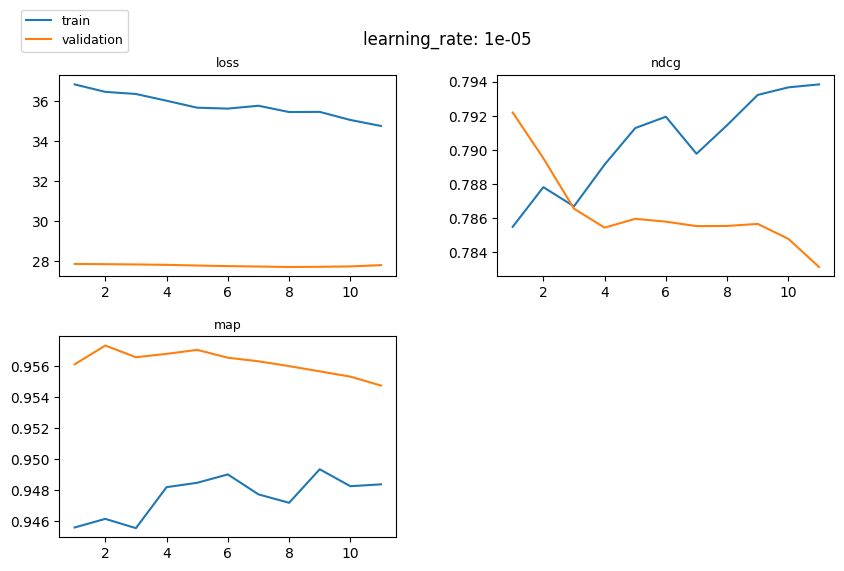

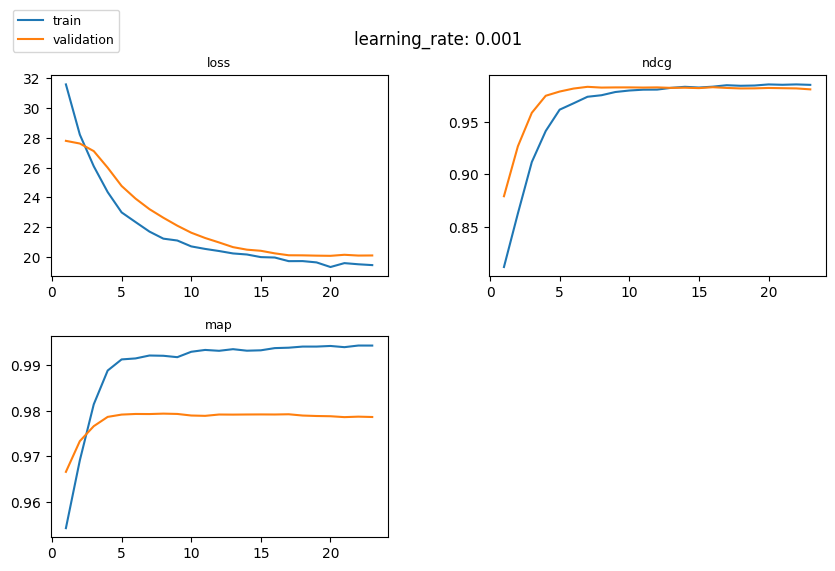

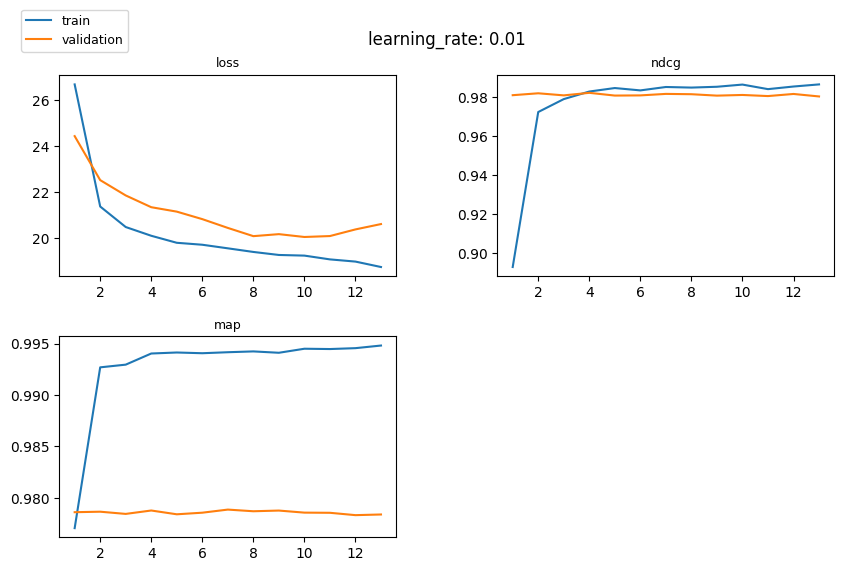

In [10]:
hyperparam_test("learning_rate", [1e-5, 1e-3, 1e-2])

From previous test we can get know that the best lr is in vicinity of 1e-3. <br> Let's find the best approximate value.

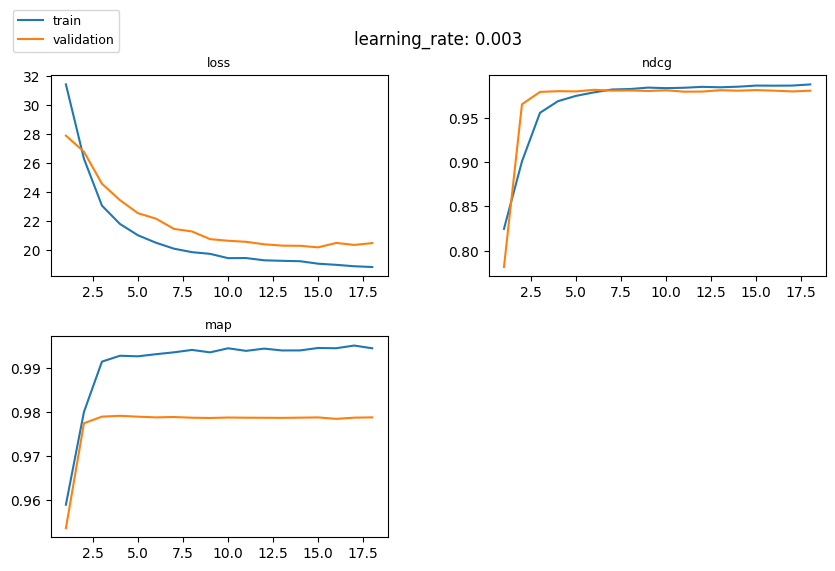

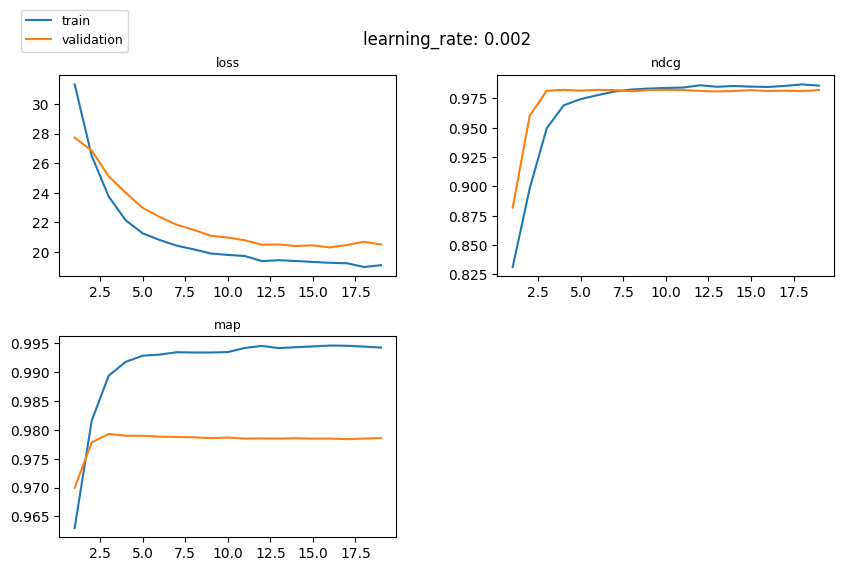

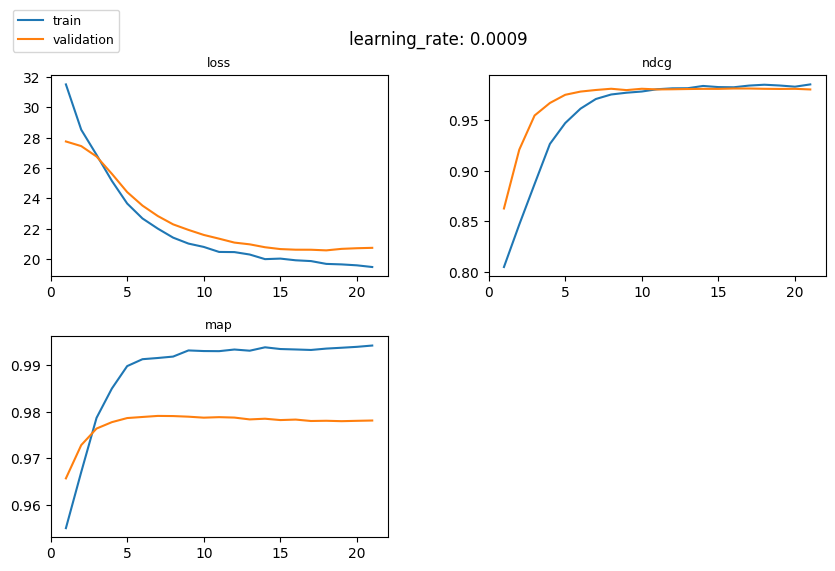

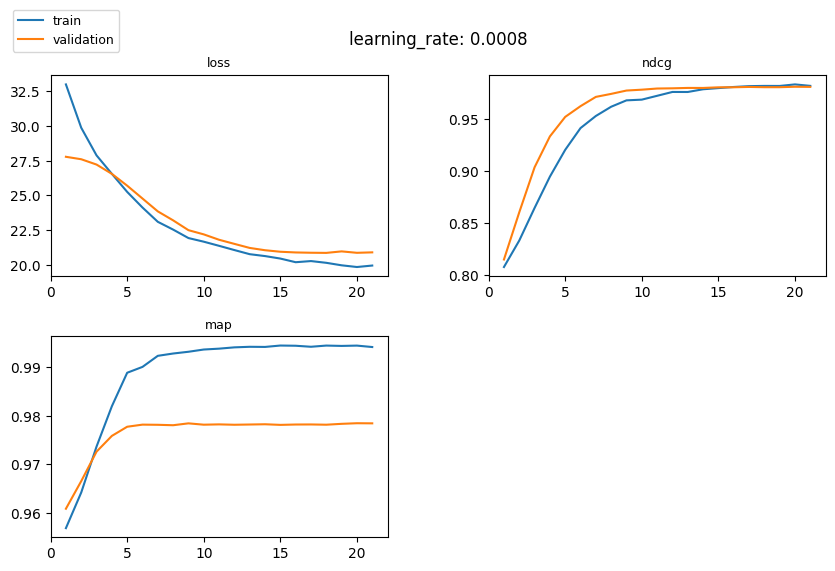

In [11]:
hyperparam_test("learning_rate", [3e-3, 2e-3, 9e-4, 8e-4])

Result: 1e-3 (small changes made no positive impact)

In [12]:
params["learning_rate"] = 1e-3

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


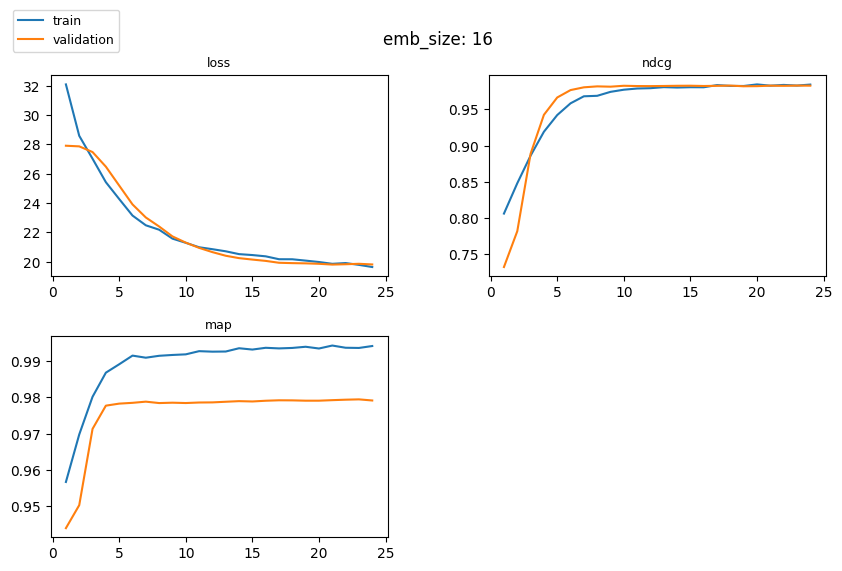

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


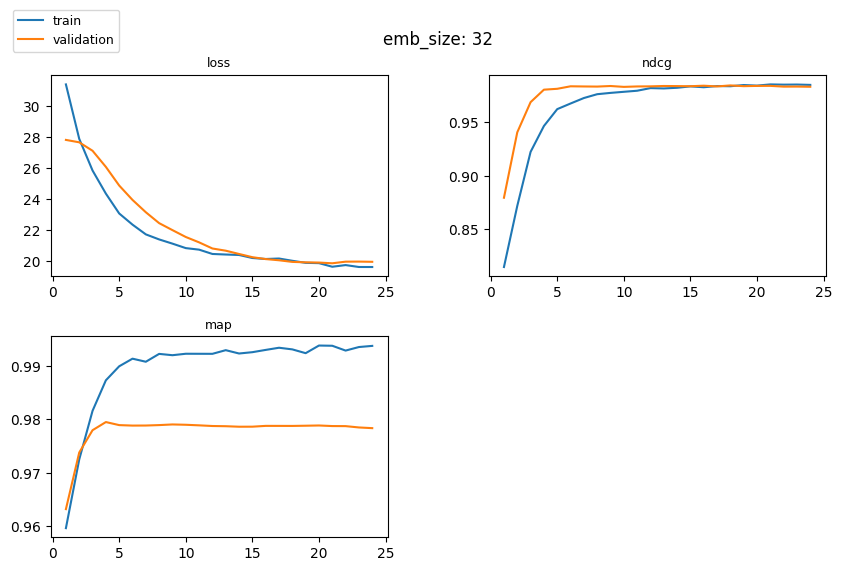

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


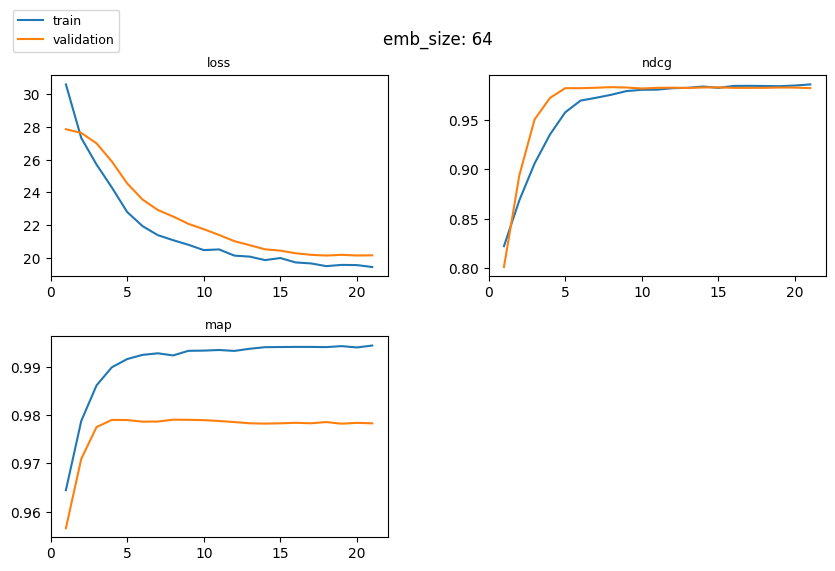

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


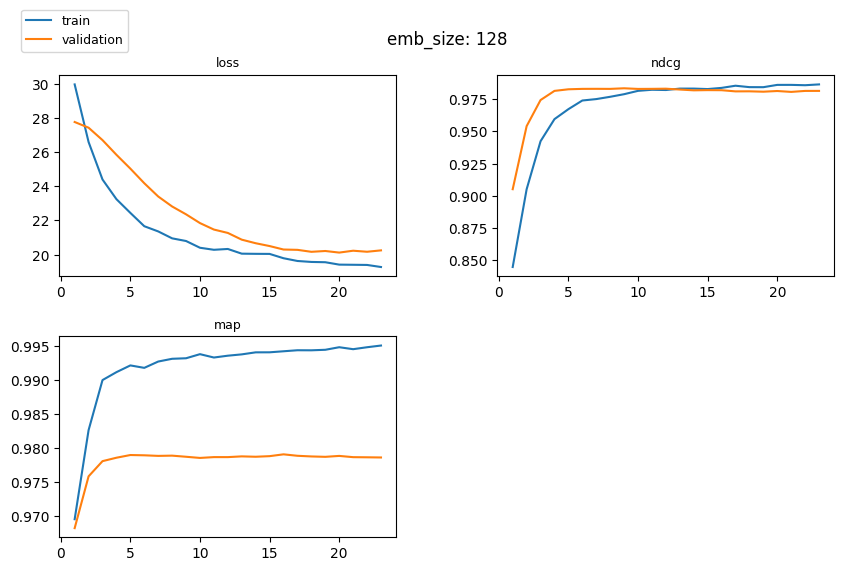

In [13]:
hyperparam_test("emb_size", [16, 32, 64, 128], need_init=True)

Result: 16 *(the most stable)*

In [14]:
emb_size = 16

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


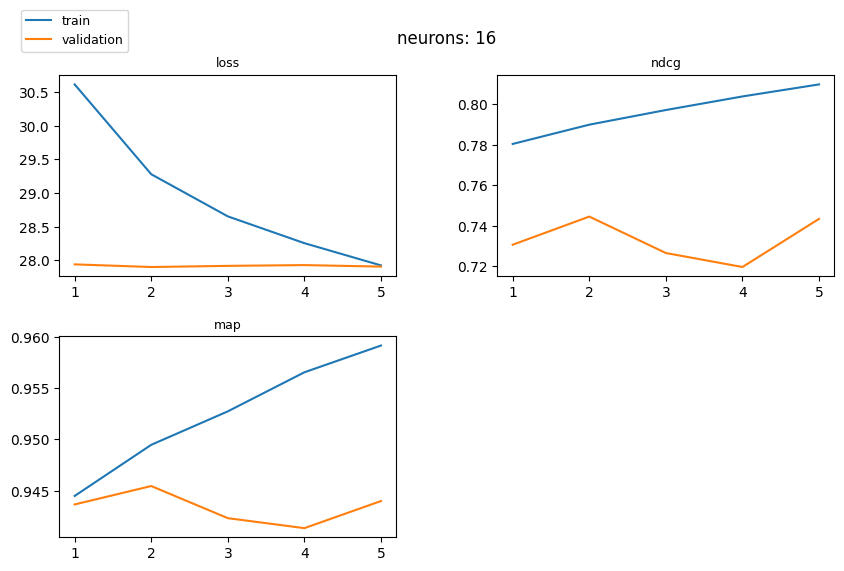

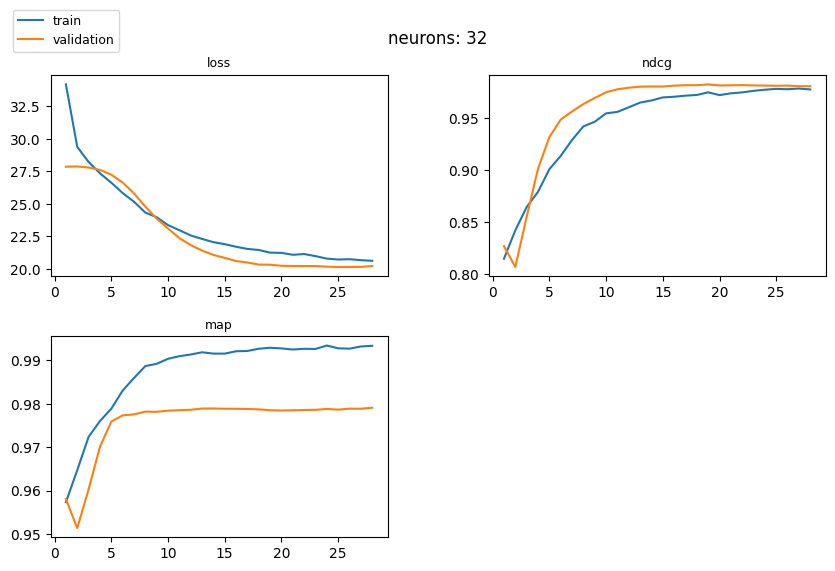

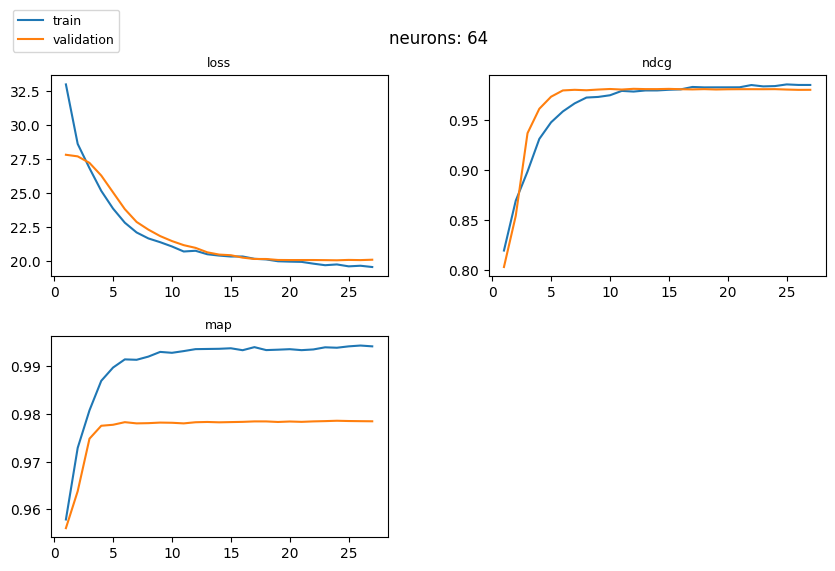

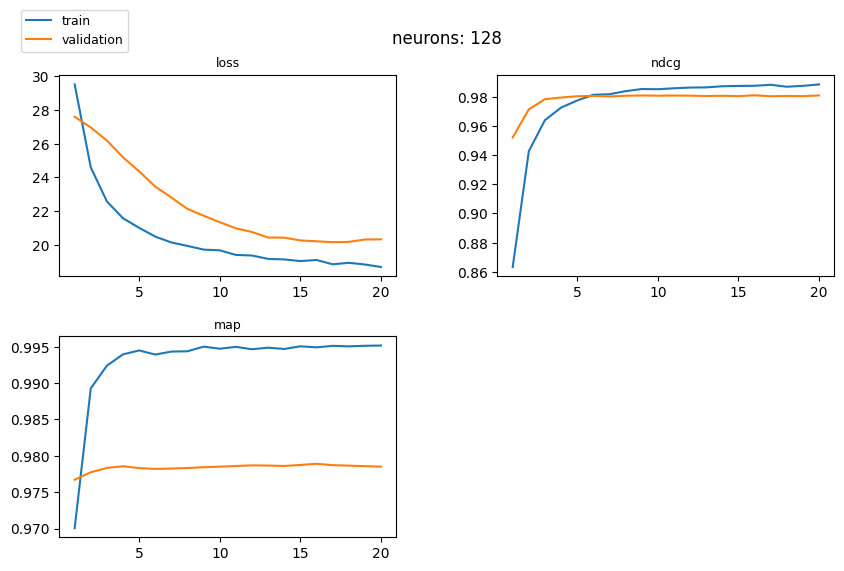

In [15]:
hyperparam_test("neurons", [16, 32, 64, 128])

Result: 32/64 *(similar average performance in few tests)*

In [16]:
params["neurons"] = 32

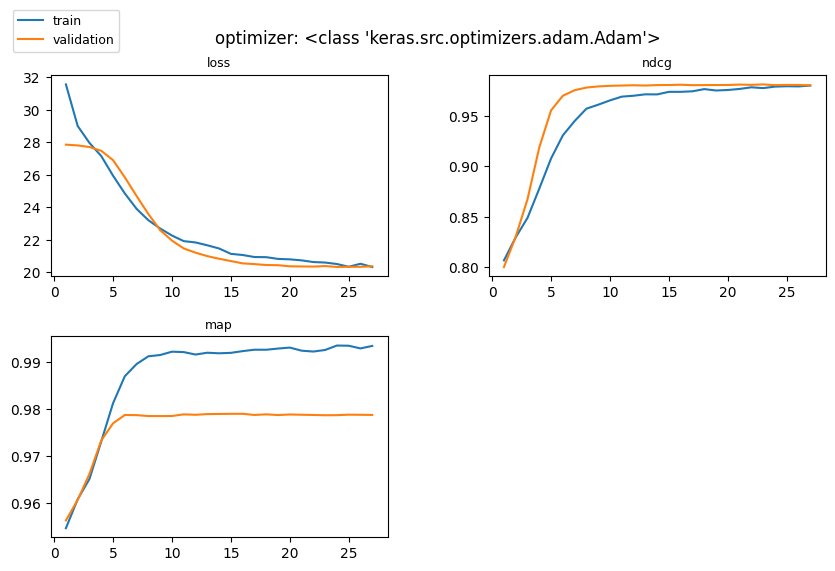

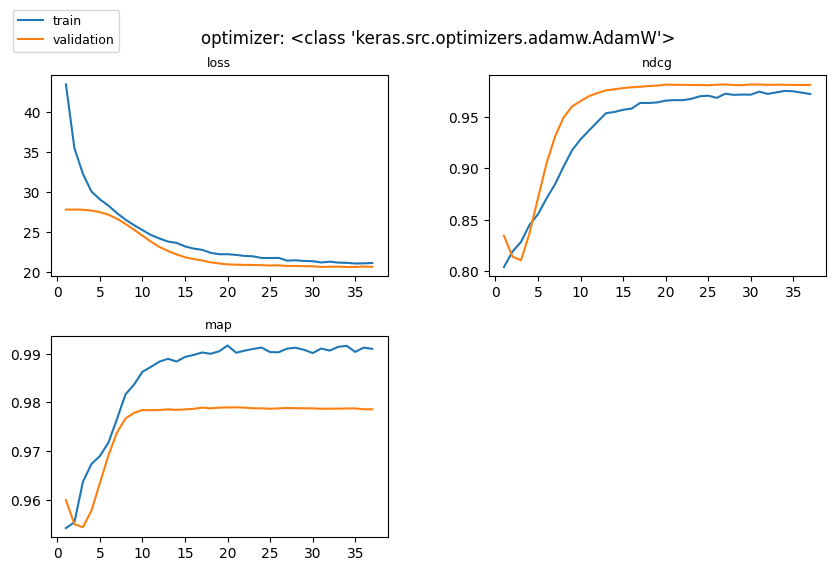

In [17]:
from tensorflow import optimizers

hyperparam_test("optimizer", [optimizers.Adam, optimizers.AdamW])

Result: no difference between them

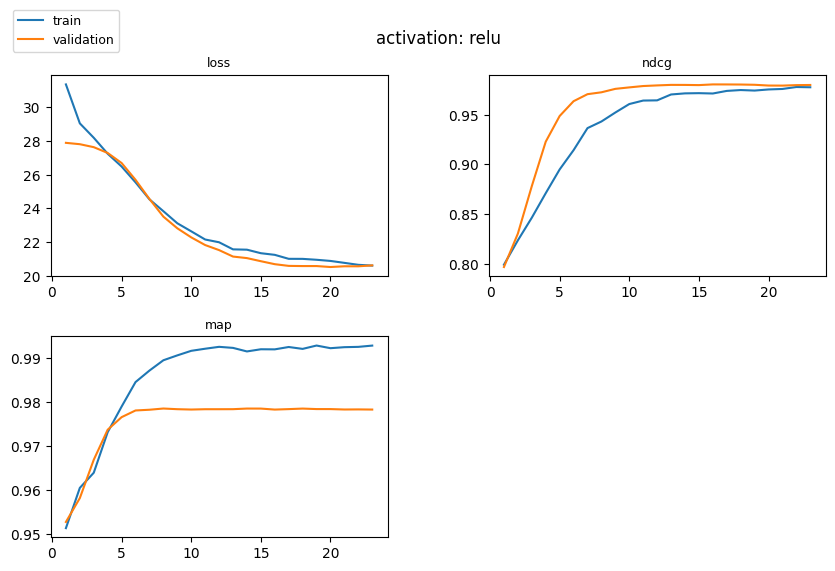

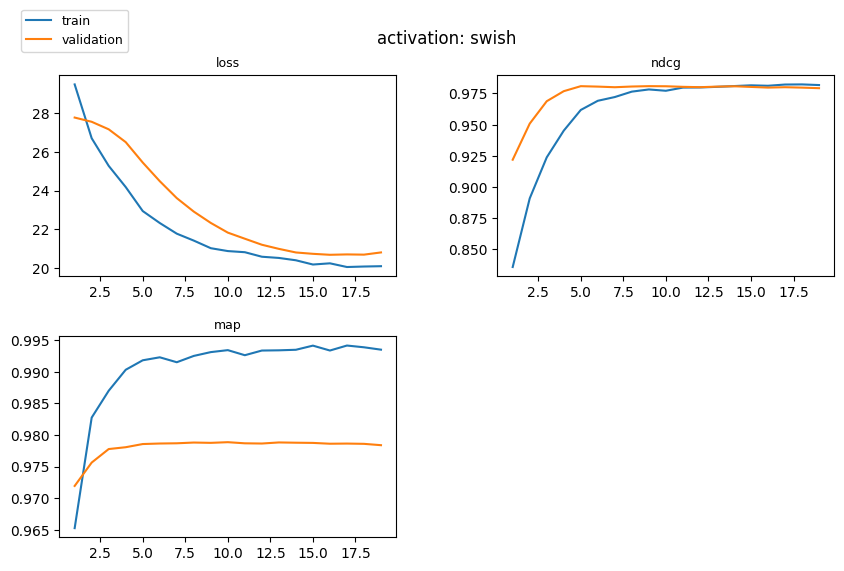

In [18]:
hyperparam_test("activation", ["relu", "swish"])

Result: no difference between them

In [19]:
print(params)
MLELossParams = params.copy()

{'learning_rate': 0.001, 'neurons': 32}


# ApproxNDCG - tests

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


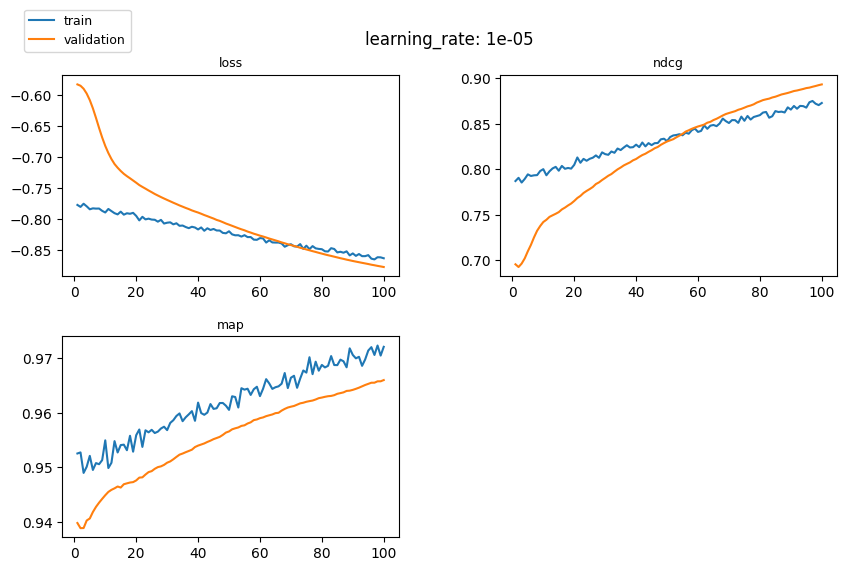

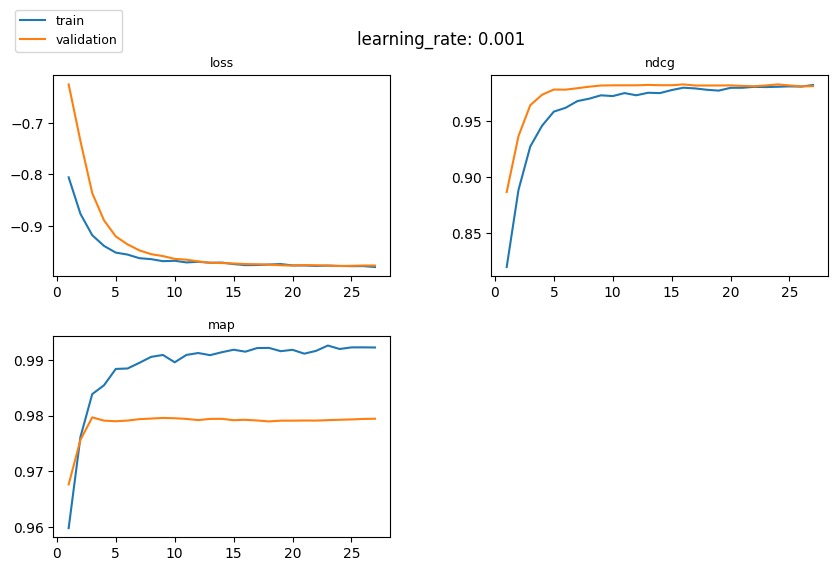

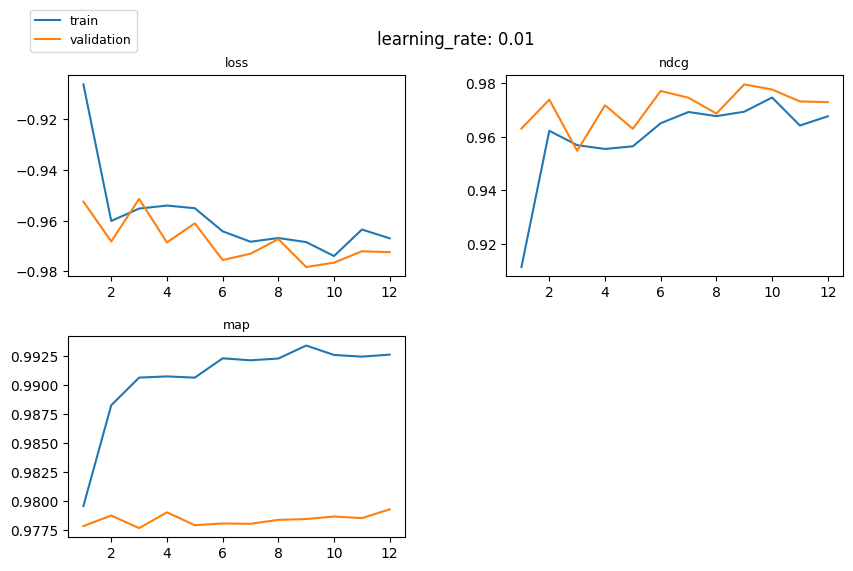

In [3]:
from tensorflow_ranking.python.keras.losses import ApproxNDCGLoss
params = { "loss_func": ApproxNDCGLoss }

hyperparam_test("learning_rate", [1e-5, 1e-3, 1e-2])

From previous test we can get know that the best lr is in vicinity of 1e-3. <br> Let's find the best approximate value.

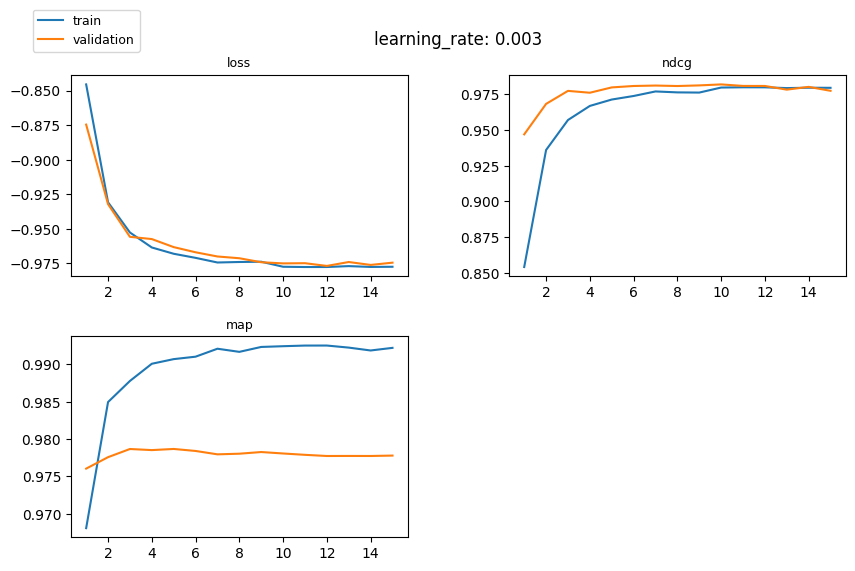

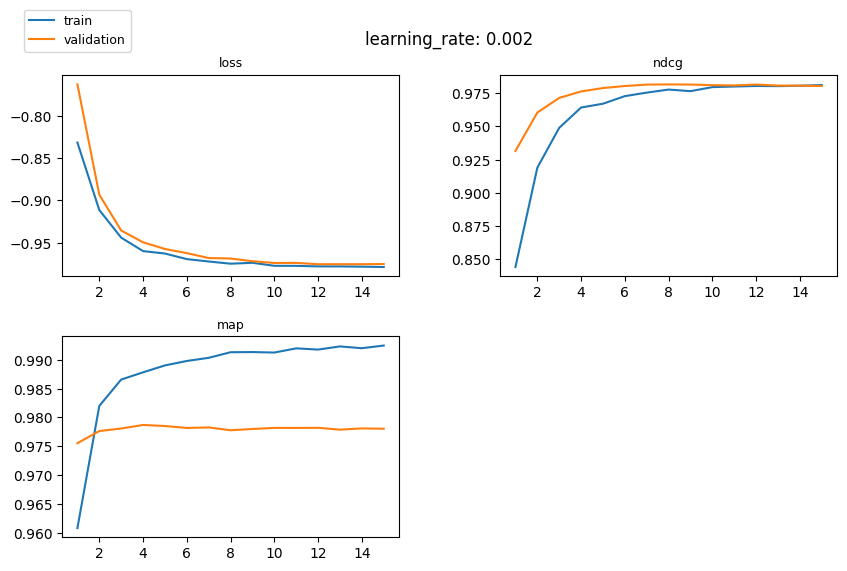

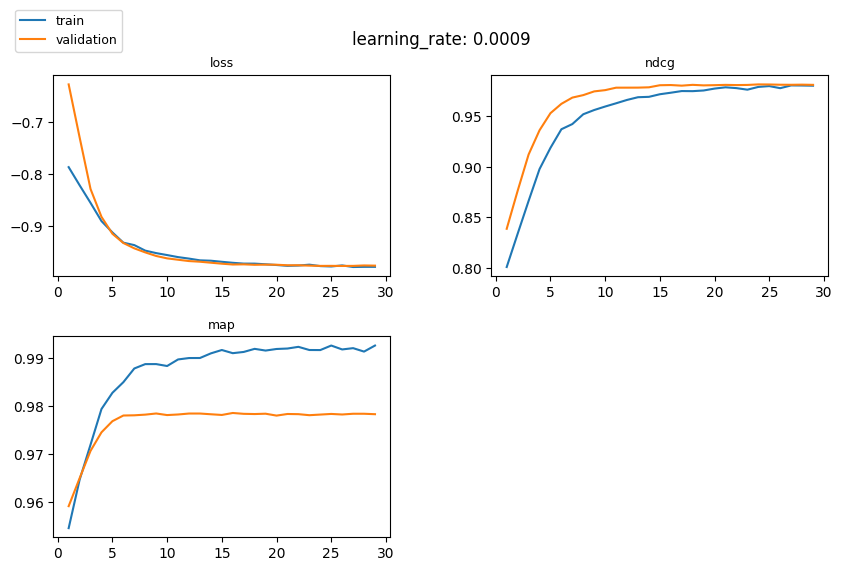

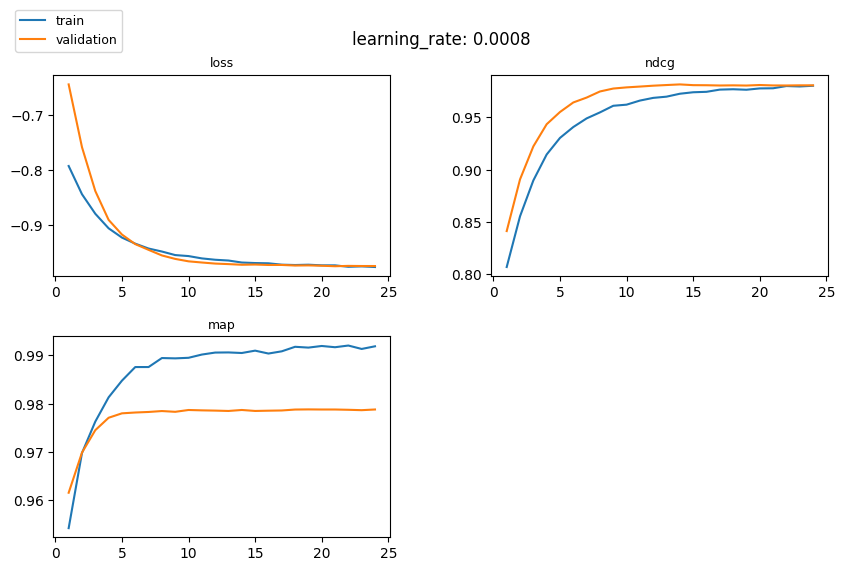

In [28]:
hyperparam_test("learning_rate", [3e-3, 2e-3, 9e-4, 8e-4])

Result: 8e-4 (better ndcg value)

In [4]:
params["learning_rate"] = 8e-4

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


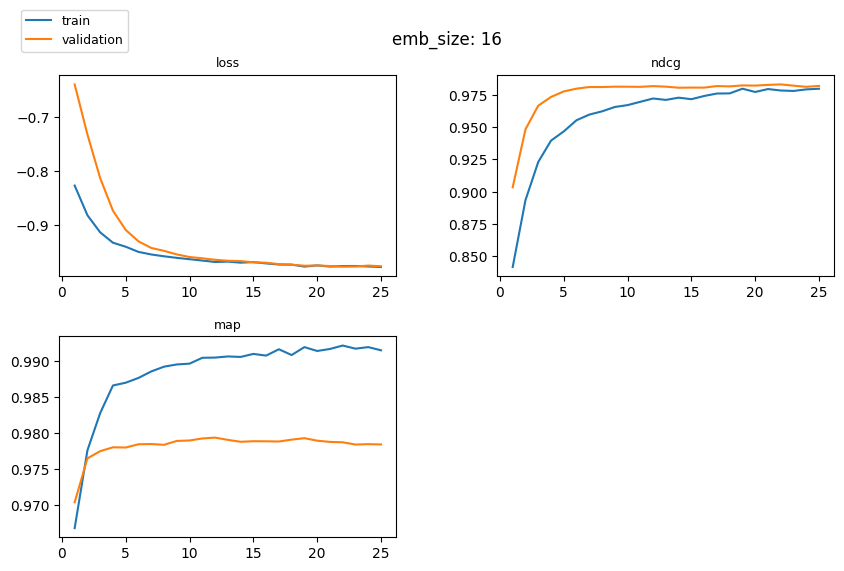

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


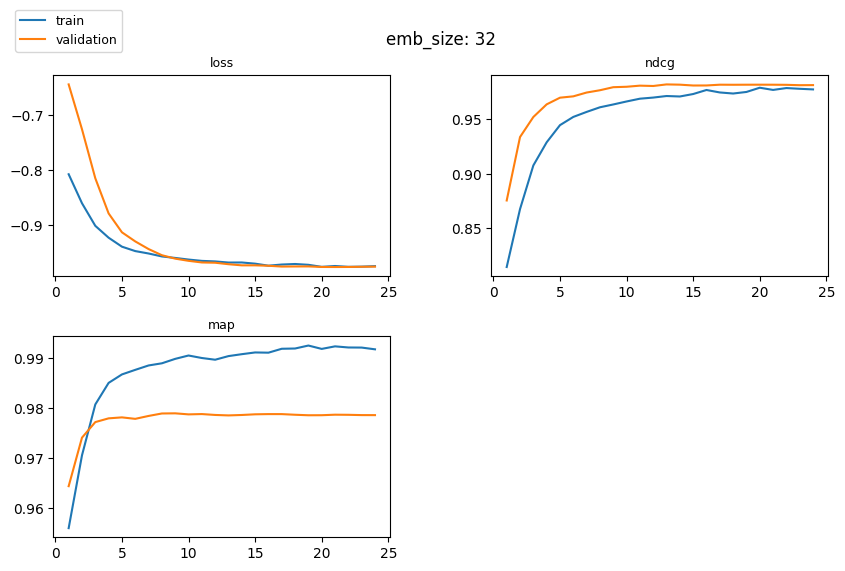

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


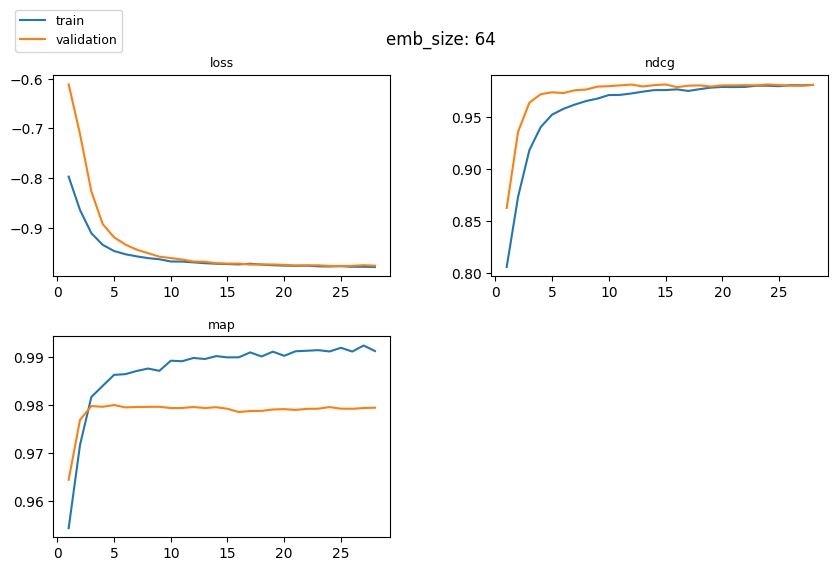

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


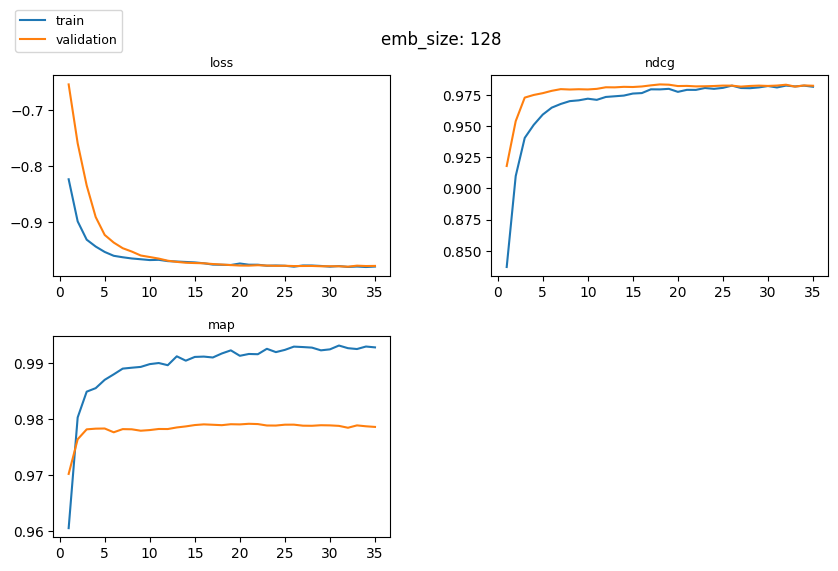

In [30]:
hyperparam_test("emb_size", [16, 32, 64, 128], need_init=True)

Result: 64 *(the most stable)*

In [31]:
emb_size = 64

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


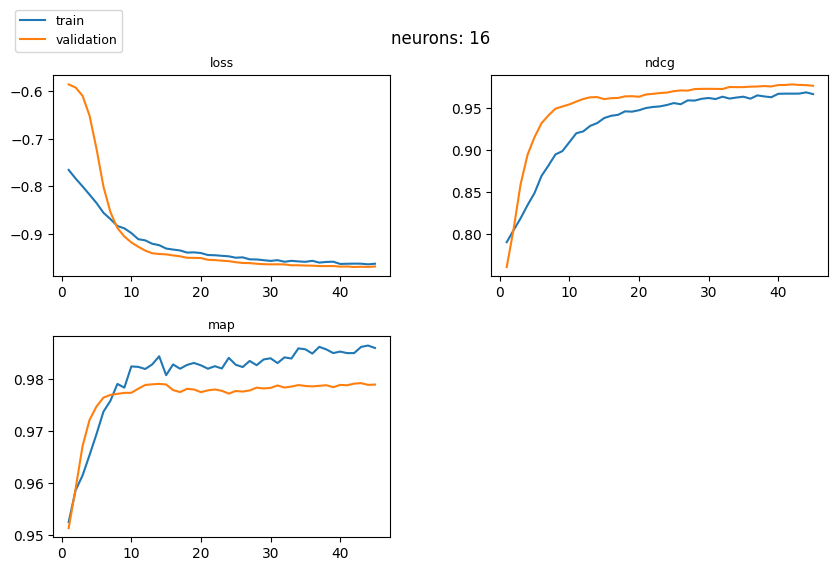

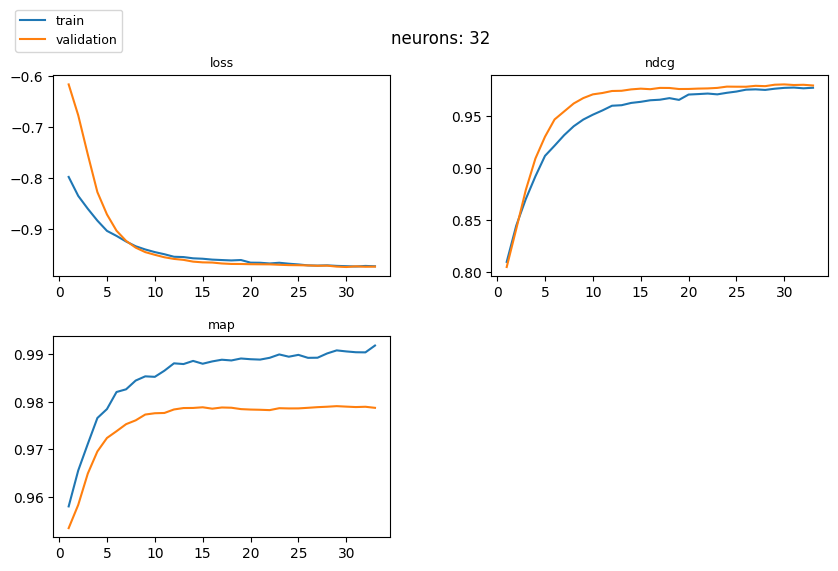

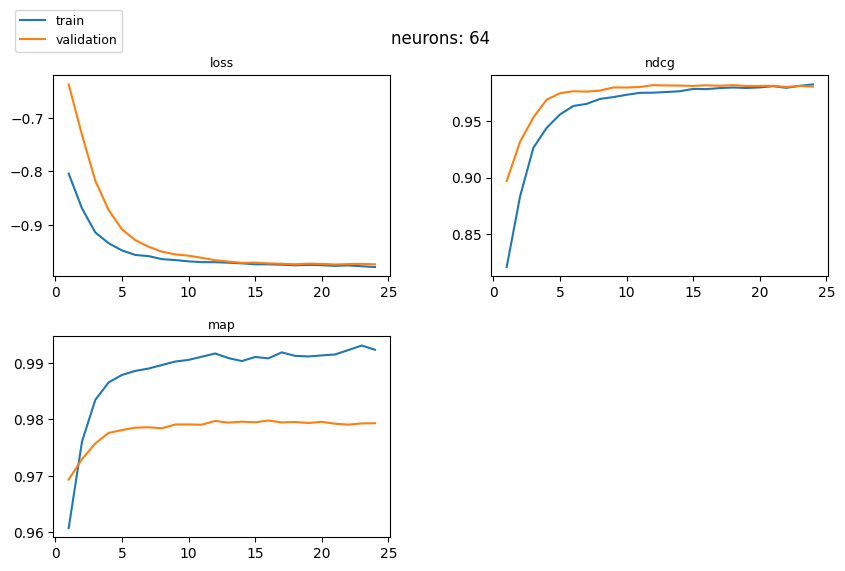

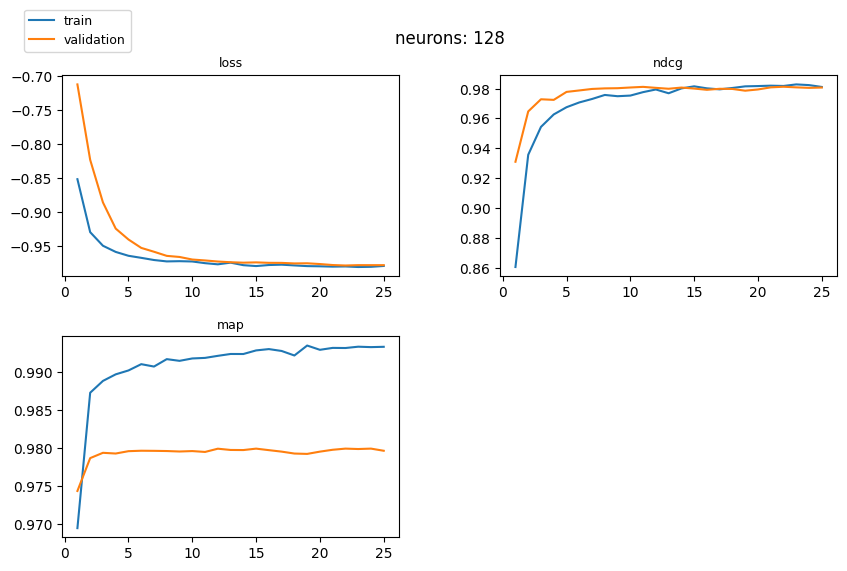

In [32]:
hyperparam_test("neurons", [16, 32, 64, 128])

Result: 64 *(The most stable)*

In [5]:
params["neurons"] = 64

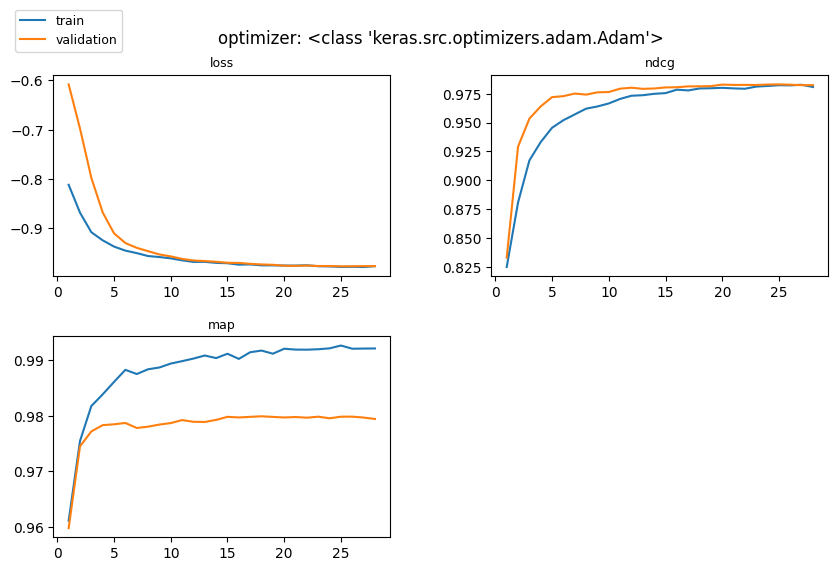

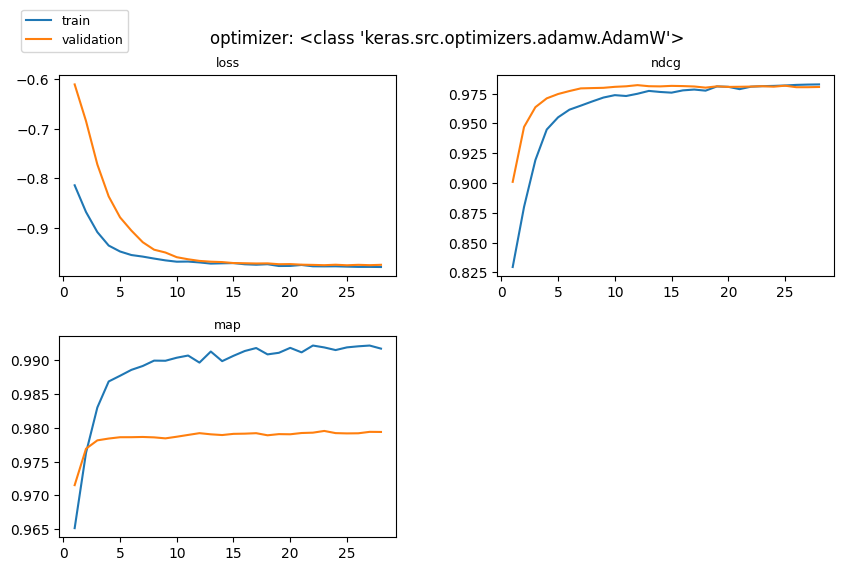

In [34]:
from tensorflow import optimizers

hyperparam_test("optimizer", [optimizers.Adam, optimizers.AdamW])

Result: no difference between them

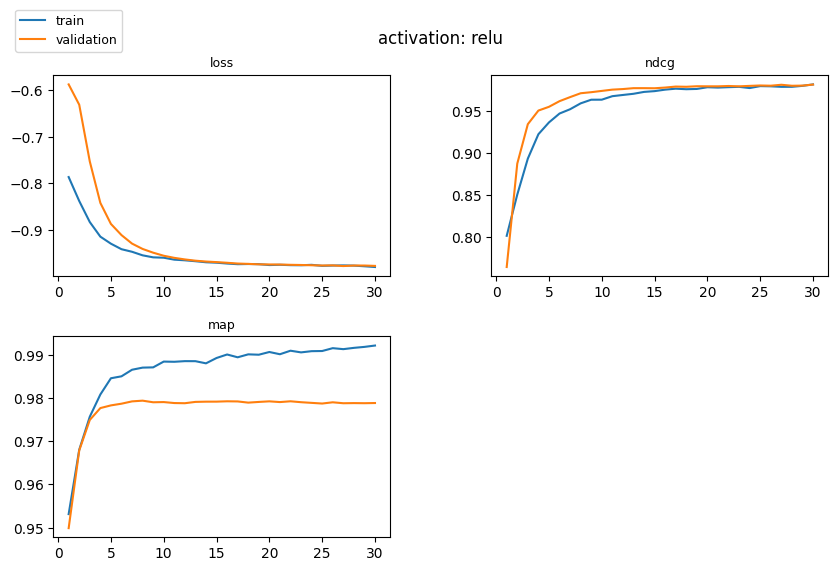

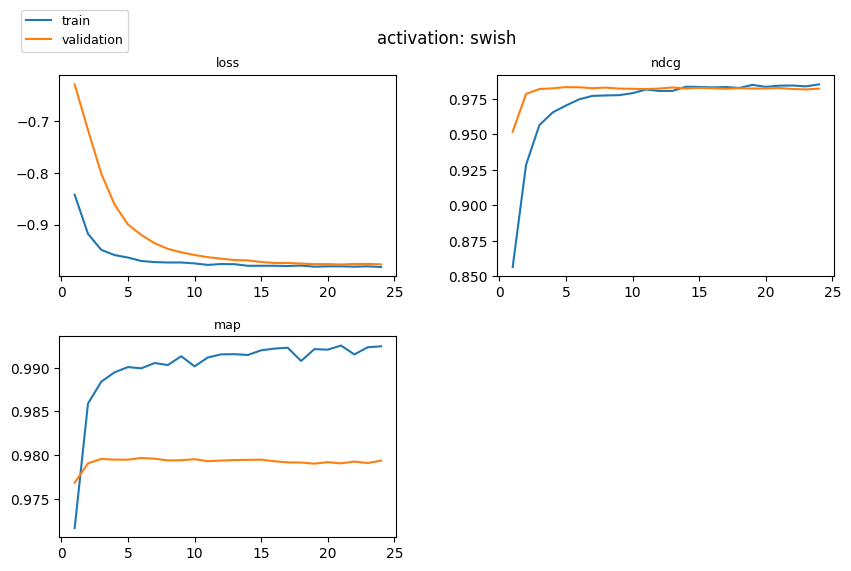

In [35]:
hyperparam_test("activation", ["relu", "swish"])

Result: relu (more stable)

In [6]:
params["activation"] = "relu"

In [7]:
print(params)
ApproxNDCGParams = params.copy()

{'loss_func': <class 'tensorflow_ranking.python.keras.losses.ApproxNDCGLoss'>, 'learning_rate': 0.0008, 'neurons': 64, 'activation': 'relu'}


# List MLE and Approx NDCG - comparison

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


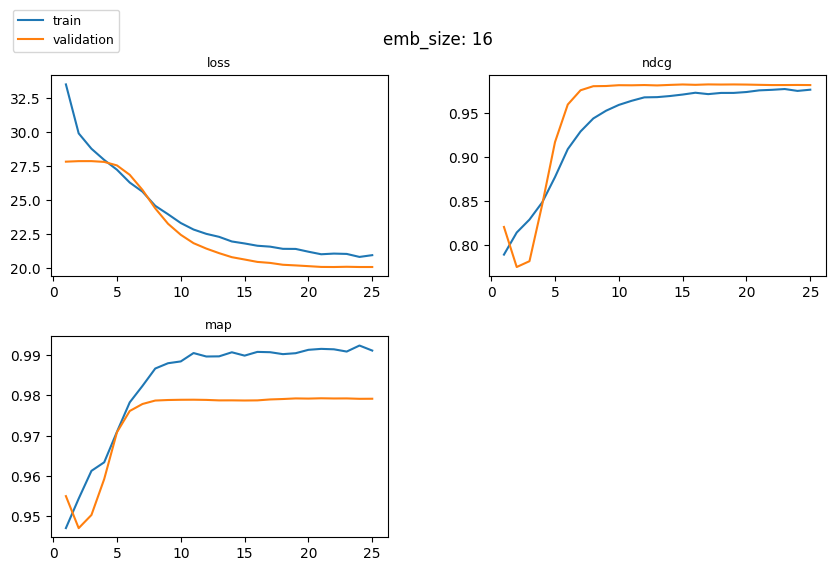

In [38]:
params = MLELossParams
hyperparam_test("emb_size", [16], need_init=True)

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


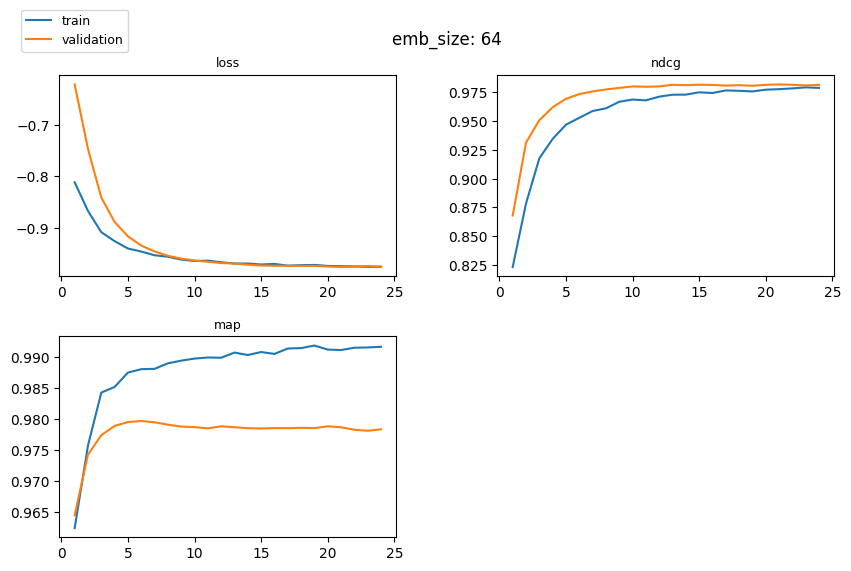

In [39]:
params = ApproxNDCGParams
hyperparam_test("emb_size", [64], need_init=True)

### Result: Approx NDCG

# Records simulation - learning rate tests
For ApproxNDCG moddel **(4000 for tests, after them 15000 records)**

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


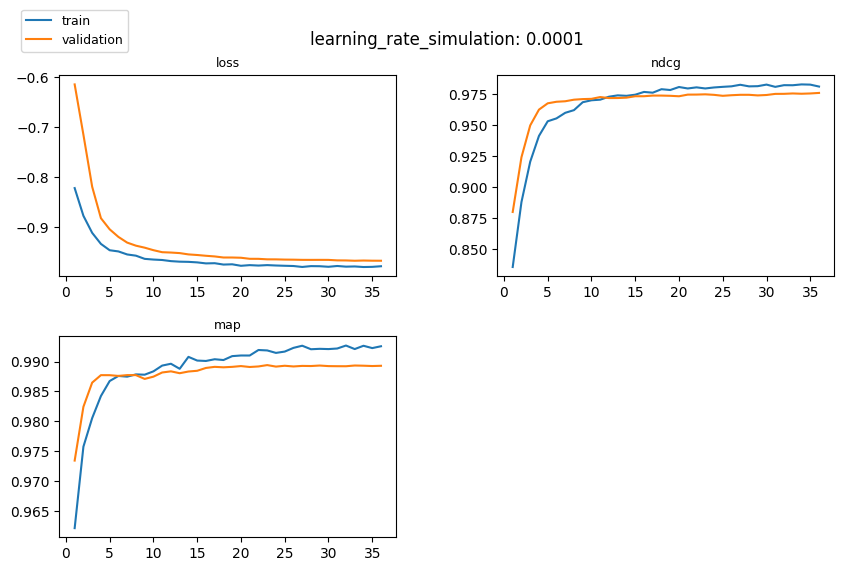

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


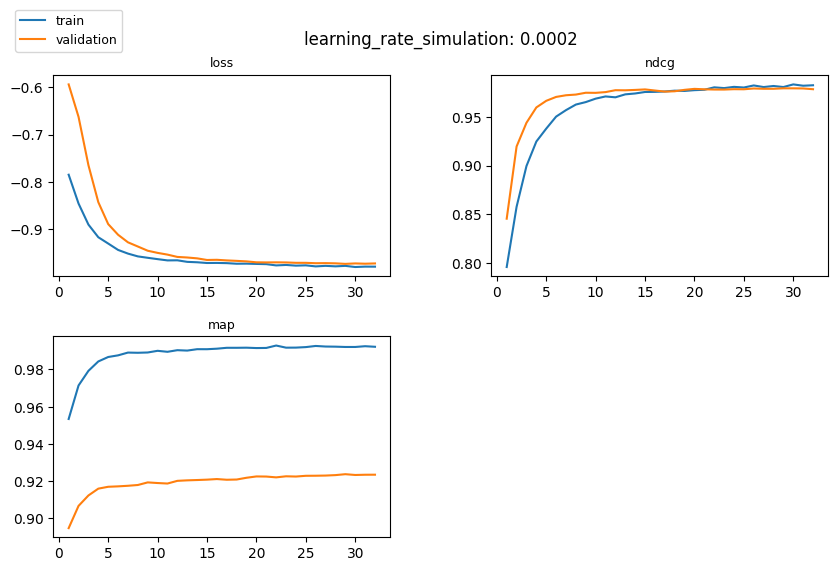

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


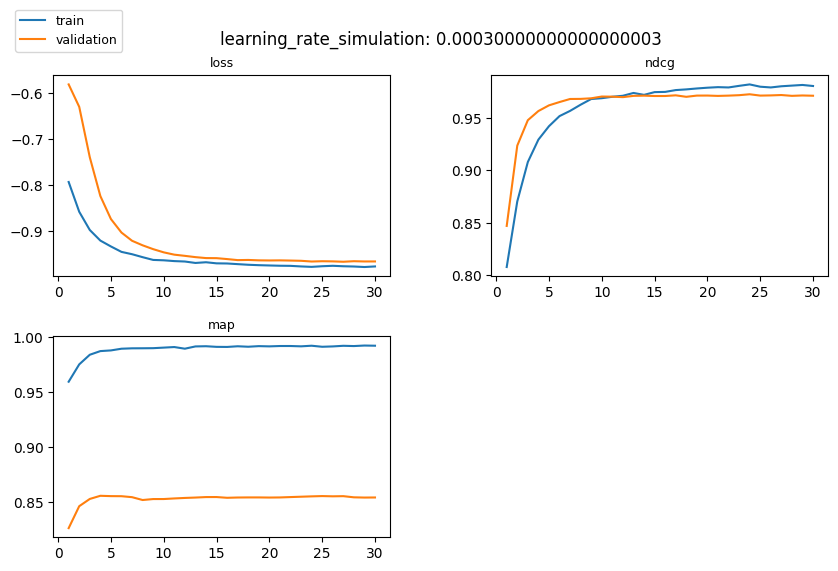

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


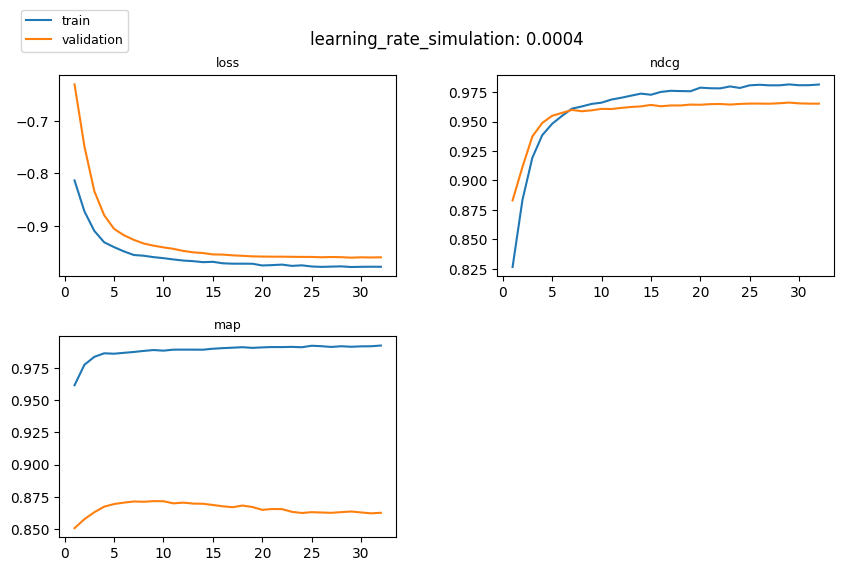

In [8]:
import numpy as np

params = ApproxNDCGParams
hyperparam_test("simulation_learning_rate", np.array(range(1, 5)) * 1e-4, need_init=True)

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


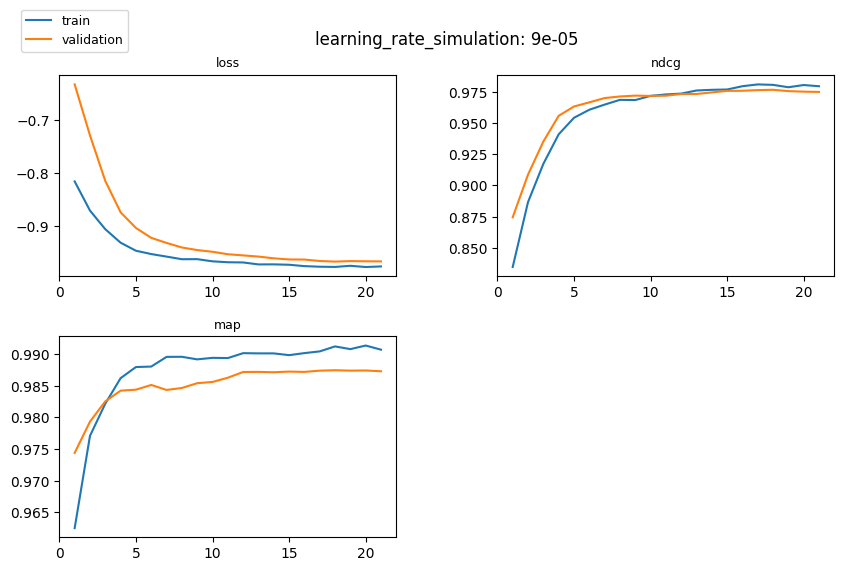

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


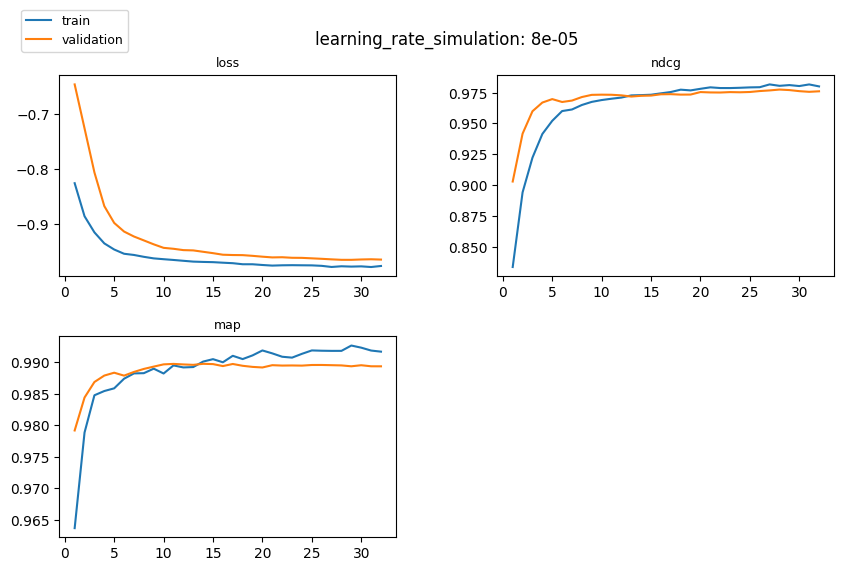

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


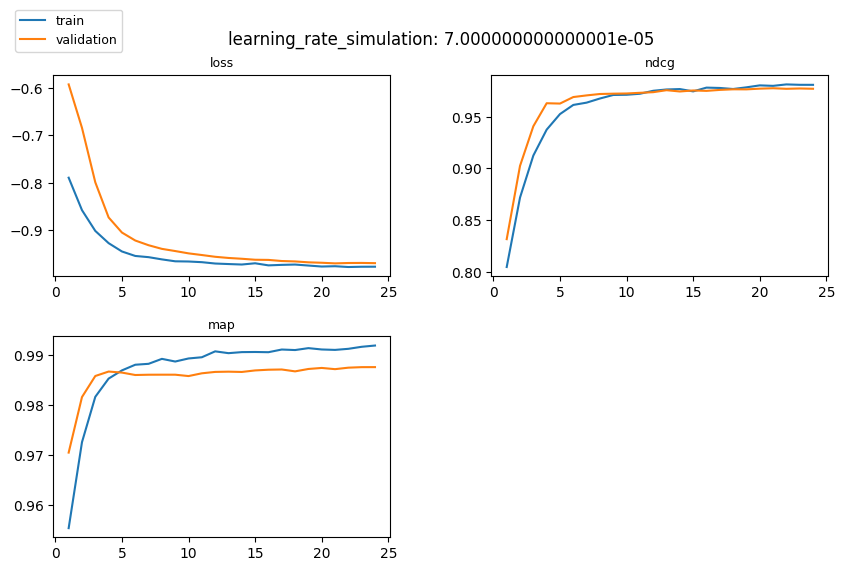

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


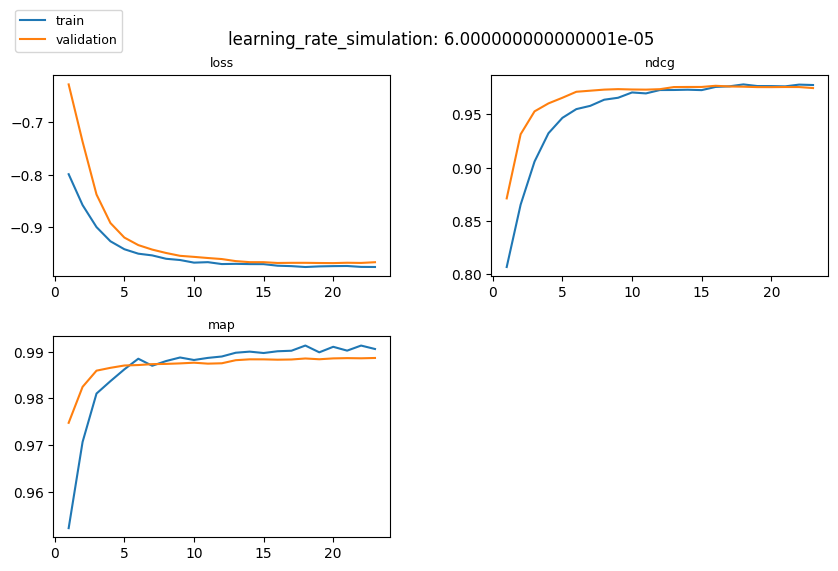

In [9]:
import numpy as np

params = ApproxNDCGParams
hyperparam_test("simulation_learning_rate", np.array(range(9, 5, -1)) * 1e-5, need_init=True)

### Result: 9e-5 (the most stable)

# Final result

/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['weighted_rating'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


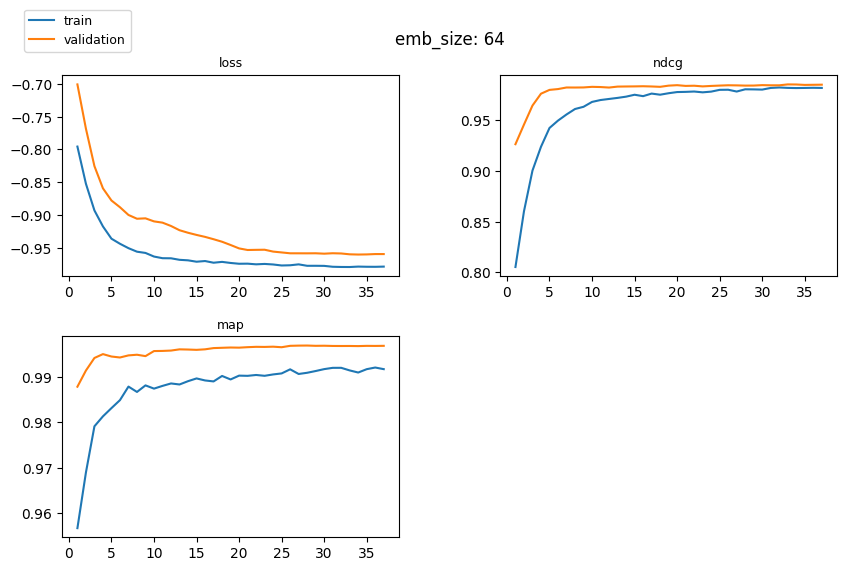

Recommendation for random user with id: 349



/home/krystian/miniconda3/envs/recom-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


      movie_id                       title  predicted_rating
482        484  Maltese Falcon, The (1941)         -3.688107
609        611                Laura (1944)         -3.720114
523        525       Big Sleep, The (1946)         -3.987827
1202      1204   To Be or Not to Be (1942)         -4.603813
1473      1476             Raw Deal (1948)         -4.658393
481        483           Casablanca (1942)         -4.985613
392        394    Radioland Murders (1994)         -5.067250
491        493        Thin Man, The (1934)         -5.108849
639        641       Paths of Glory (1957)         -5.176889
601        603          Rear Window (1954)         -5.216152


In [9]:
params = ApproxNDCGParams
hyperparam_test("emb_size", [64], need_init=True, reccommend_random_user=True)